In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import supervision as sv
import pickle
import os
import pandas as pd
import torch
import sys
sys.path.append('../')
from sklearn.cluster import KMeans

### 1. 크롭 이미지 불러오기
* 이미지 크롭은 main()에서 시행

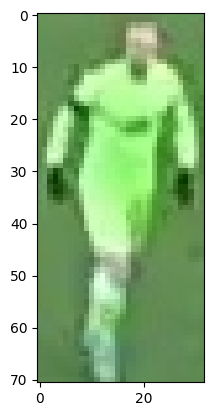

In [2]:
image_path = r"C:\krpython\Final Project\football\pretrain\output_video\cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [27]:
frame = image
frame

array([[[102, 147,  88],
        [103, 147,  88],
        [106, 147,  89],
        ...,
        [100, 148,  88],
        [100, 147,  92],
        [101, 148,  93]],

       [[102, 147,  88],
        [104, 148,  89],
        [106, 147,  89],
        ...,
        [104, 149,  92],
        [105, 148,  92],
        [ 98, 141,  87]],

       [[102, 147,  88],
        [103, 147,  88],
        [105, 146,  88],
        ...,
        [102, 143,  87],
        [104, 141,  87],
        [106, 143,  89]],

       ...,

       [[ 91, 131,  81],
        [ 90, 130,  78],
        [ 89, 129,  77],
        ...,
        [ 94, 137,  83],
        [ 94, 137,  81],
        [ 96, 139,  83]],

       [[ 90, 130,  80],
        [ 89, 129,  77],
        [ 89, 129,  77],
        ...,
        [ 94, 137,  83],
        [ 94, 137,  81],
        [ 95, 138,  82]],

       [[ 93, 133,  83],
        [ 92, 132,  80],
        [ 90, 133,  80],
        ...,
        [ 93, 136,  82],
        [ 93, 136,  80],
        [ 93, 136,  80]]

In [28]:
frame[bbox]

NameError: name 'bbox' is not defined

### 2. 크롭 이미지 절반으로 cut

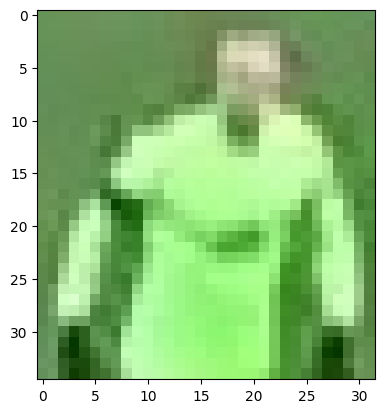

In [3]:
# 비율
top_half_image = image[0: int(image.shape[0] / 2), :] # 가로 0~35 / 세로는 전체
plt.imshow(top_half_image)

### 3. 이미지 클러스터링

In [15]:
top_half_image[0][:2]


array([[102, 147,  88],
       [103, 147,  88]], dtype=uint8)

In [12]:
# 배열 변경
image_2d = top_half_image.reshape(-1, 3)
image_2d[0]

array([102, 147,  88], dtype=uint8)

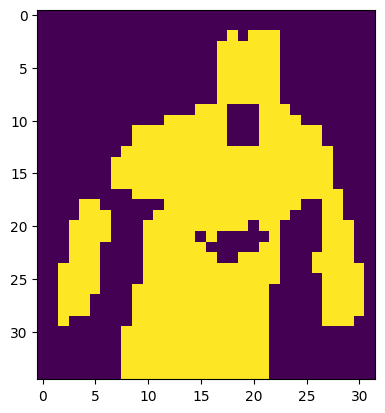

In [16]:
# 클러스터링

# 이미지는 3차원 배열(2차원 픽셀 , 색상값)임. 이를 2차원으로 변환 -> kmeans 클러스터링 적용 위해

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# 1차원 배열로 변환 -> 속하는 클러스터 나타냄
labels = kmeans.labels_ # array([0, 0, 0, ..., 0, 0, 0]) > 1차원

# 원래 이미지 형태로 복원 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1]) # 원래 이미지의 모양(높이, 너비)에 맞춰 다시 2차원으로 배열 변환 (원래 이미지 모양으로 복원하기 위해)

# top_half_image.shape > (35, 32, 3) : 높이, 너비, 색 채널(3개=RGB)
plt.imshow(clustered_image)
plt.show()


In [19]:
clustered_image[0,0]

0

In [24]:
# 구석 4개 클러스터 확인
corner_clusters = [clustered_image[0,0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]] # # [0, 0, 0, 0]]

non_player_cluster = max(set(corner_clusters),  # corner_clusters 중복 제거한 집합 
                         key=corner_clusters.count) # corner_cluster에서 각 레이블 빈도

player_cluster = 1 - non_player_cluster

print(non_player_cluster)
print(player_cluster)

0
1


In [9]:
kmeans.cluster_centers_[player_cluster]  # 클러스터 중심점 확인
# https://www.rapidtables.com/web/color/RGB_Color.html 여기서 색상 확인

array([     173.13,      237.85,       148.1])

In [29]:

def read_video(video_path):
    cap=cv2.VideoCapture(video_path) # 영상 파일 열기
    frames=[]
    while True:
        ret,frame=cap.read() # ret : 성공여부(True, False) / frame : 프레임 데이터 저장
        if not ret:
            break
        frames.append(frame)
    return frames

video_frames = read_video(r"C:\krpython\Final Project\football\pretrain\input_video\08fd33_4.mp4")


NameError: name 'read_video' is not defined

In [ ]:
# 영상 로드

def read_video(video_path):
    cap=cv2.VideoCapture(video_path) # 영상 파일 열기
    frames=[]
    while True:
        ret,frame=cap.read() # ret : 성공여부(True, False) / frame : 프레임 데이터 저장
        if not ret:
            break
        frames.append(frame)
    return frames # [ 68  56  58] -> 첫번째 프레임의 픽셀 값으로 [R, G, B]로 표시됨

frames=read_video(video_path)
frames